# Random Forest Model

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

### Load Data

In [2]:
# load data

df = pd.read_csv('../raw_data/final_to_model_df.csv')

In [3]:
df.shape

(950, 16)

In [4]:
df.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'WinningTeam', 'innings_total',
       'TeamA_batting_average', 'TeamB_batting_average', 'TeamA_innings_total',
       'TeamB_innings_total'],
      dtype='object')

In [5]:
df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,innings_total,TeamA_batting_average,TeamB_batting_average,TeamA_innings_total,TeamB_innings_total
0,1312200,ahmedabad,2022-05-29,2022,final,rajasthan royals,gujarat titans,"narendra modi stadium, ahmedabad",rajasthan royals,bat,gujarat titans,130,155.397906,166.437500,130.0,133.0
1,1312199,ahmedabad,2022-05-27,2022,qualifier 2,royal challengers bangalore,rajasthan royals,"narendra modi stadium, ahmedabad",rajasthan royals,field,rajasthan royals,157,155.707965,155.397906,157.0,161.0
2,1312198,kolkata,2022-05-25,2022,eliminator,royal challengers bangalore,lucknow super giants,eden gardens,lucknow super giants,field,royal challengers bangalore,207,155.707965,169.866667,207.0,193.0
3,1312197,kolkata,2022-05-24,2022,qualifier 1,rajasthan royals,gujarat titans,eden gardens,gujarat titans,field,gujarat titans,188,155.397906,166.437500,188.0,191.0
4,1304116,mumbai,2022-05-22,2022,70,sunrisers hyderabad,punjab kings,wankhede stadium,sunrisers hyderabad,bat,punjab kings,157,155.546053,158.518349,157.0,160.0


## Preprocessing

### Drop Columns

In [6]:
columns_to_delete = ['Date'] 

In [7]:
df.drop(columns=columns_to_delete, axis=1, inplace=True)

In [8]:
df.head()

,ID,City,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,innings_total,TeamA_batting_average,TeamB_batting_average,TeamA_innings_total,TeamB_innings_total
0,1312200,ahmedabad,2022,final,rajasthan royals,gujarat titans,"narendra modi stadium, ahmedabad",rajasthan royals,bat,gujarat titans,130,155.397906,166.437500,130.0,133.0
1,1312199,ahmedabad,2022,qualifier 2,royal challengers bangalore,rajasthan royals,"narendra modi stadium, ahmedabad",rajasthan royals,field,rajasthan royals,157,155.707965,155.397906,157.0,161.0
2,1312198,kolkata,2022,eliminator,royal challengers bangalore,lucknow super giants,eden gardens,lucknow super giants,field,royal challengers bangalore,207,155.707965,169.866667,207.0,193.0
3,1312197,kolkata,2022,qualifier 1,rajasthan royals,gujarat titans,eden gardens,gujarat titans,field,gujarat titans,188,155.397906,166.437500,188.0,191.0
4,1304116,mumbai,2022,70,sunrisers hyderabad,punjab kings,wankhede stadium,sunrisers hyderabad,bat,punjab kings,157,155.546053,158.518349,157.0,160.0


### Change Data Type

In [9]:
df.dtypes

ID                         int64
City                      object
Season                     int64
MatchNumber               object
Team1                     object
Team2                     object
Venue                     object
TossWinner                object
TossDecision              object
WinningTeam               object
innings_total              int64
TeamA_batting_average    float64
TeamB_batting_average    float64
TeamA_innings_total      float64
TeamB_innings_total      float64
dtype: object

In [10]:
# convert Season to date
#df['Season'] = pd.to_datetime(df['Season'], format='%Y')

In [11]:
#df.dtypes

### Enconding

#### Toss Decision

In [12]:
# Toss Decision --> 0 = bat ; 1 = field

label_encoder = LabelEncoder()

In [13]:
# fit the function
label_encoder.fit(df['TossDecision'])

LabelEncoder()

In [14]:
df['TossDecision'] = label_encoder.transform(df['TossDecision'])

In [15]:
df.head(3)

,ID,City,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,innings_total,TeamA_batting_average,TeamB_batting_average,TeamA_innings_total,TeamB_innings_total
0,1312200,ahmedabad,2022,final,rajasthan royals,gujarat titans,"narendra modi stadium, ahmedabad",rajasthan royals,0,gujarat titans,130,155.397906,166.437500,130.0,133.0
1,1312199,ahmedabad,2022,qualifier 2,royal challengers bangalore,rajasthan royals,"narendra modi stadium, ahmedabad",rajasthan royals,1,rajasthan royals,157,155.707965,155.397906,157.0,161.0
2,1312198,kolkata,2022,eliminator,royal challengers bangalore,lucknow super giants,eden gardens,lucknow super giants,1,royal challengers bangalore,207,155.707965,169.866667,207.0,193.0


#### City

In [16]:
# model
ohe = OneHotEncoder(sparse_output=False)

In [17]:
ohe.fit(df[['City']])

OneHotEncoder(sparse_output=False)

In [18]:
df[ohe.get_feature_names_out()] = ohe.transform(df[['City']])

In [19]:
df.drop(columns = ["City"], inplace = True)

In [20]:
df.shape

(950, 47)

#### Match Number

In [21]:
df.MatchNumber.unique() # playoffs = 1 ; regular games = 0

array(['final', 'qualifier 2', 'eliminator', 'qualifier 1', '70', '69',
       '68', '67', '66', '65', '64', '63', '62', '61', '60', '59', '58',
       '57', '56', '55', '54', '53', '52', '51', '50', '49', '48', '47',
       '46', '45', '44', '43', '42', '41', '40', '39', '38', '37', '36',
       '35', '34', '33', '32', '31', '30', '29', '28', '27', '26', '25',
       '24', '23', '22', '21', '20', '19', '18', '17', '16', '15', '14',
       '13', '12', '11', '10', '9', '8', '7', '6', '5', '4', '3', '2',
       '1', 'qualifier', 'elimination final', '72', '71',
       '3rd place play-off', 'semi final'], dtype=object)

In [22]:
# function
def map_match_number(value):
    if isinstance(value, int) or value.isnumeric():
        return 0
    elif isinstance(value, str):
        return 1
    else:
        return value

In [23]:
df['MatchNumber'] = df['MatchNumber'].apply(map_match_number)

In [24]:
df.rename(columns={'MatchNumber': 'MatchImportance'}, inplace=True)

In [25]:
df.head()

,ID,Season,MatchImportance,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,innings_total,...,City_mumbai,City_nagpur,City_navi mumbai,City_port elizabeth,City_pune,City_raipur,City_rajkot,City_ranchi,City_sharjah,City_visakhapatnam
0,1312200,2022,1,rajasthan royals,gujarat titans,"narendra modi stadium, ahmedabad",rajasthan royals,0,gujarat titans,130,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1312199,2022,1,royal challengers bangalore,rajasthan royals,"narendra modi stadium, ahmedabad",rajasthan royals,1,rajasthan royals,157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1312198,2022,1,royal challengers bangalore,lucknow super giants,eden gardens,lucknow super giants,1,royal challengers bangalore,207,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1312197,2022,1,rajasthan royals,gujarat titans,eden gardens,gujarat titans,1,gujarat titans,188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1304116,2022,0,sunrisers hyderabad,punjab kings,wankhede stadium,sunrisers hyderabad,0,punjab kings,157,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df.MatchImportance.value_counts() # ok

MatchImportance
0    892
1     58
Name: count, dtype: int64

In [27]:
df.MatchImportance.isnull().sum()

0

In [28]:
df.MatchImportance.isna().sum()

0

#### WinningTeam

In [29]:
# WnningTeam = 1 --> Team1 Won

In [30]:
df.head(2)

,ID,Season,MatchImportance,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,innings_total,...,City_mumbai,City_nagpur,City_navi mumbai,City_port elizabeth,City_pune,City_raipur,City_rajkot,City_ranchi,City_sharjah,City_visakhapatnam
0,1312200,2022,1,rajasthan royals,gujarat titans,"narendra modi stadium, ahmedabad",rajasthan royals,0,gujarat titans,130,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1312199,2022,1,royal challengers bangalore,rajasthan royals,"narendra modi stadium, ahmedabad",rajasthan royals,1,rajasthan royals,157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df.WinningTeam.value_counts()

WinningTeam
mumbai indians                 131
chennai super kings            121
kolkata knight riders          114
royal challengers bangalore    109
delhi capitals                 103
punjab kings                   101
rajasthan royals                96
sunrisers hyderabad             75
deccan chargers                 29
rising pune supergiant          15
gujarat lions                   13
gujarat titans                  12
pune warriors                   12
lucknow super giants             9
kochi tuskers kerala             6
noresults                        4
Name: count, dtype: int64

In [32]:
# function
def map_winning_team(row):
    if row['WinningTeam'] == row['Team1']:
        return 1
    elif row['WinningTeam'] == row['Team2']:
        return 0
    else:
        return -1

In [33]:
df['WinningTeam'] = df.apply(map_winning_team, axis=1)

In [34]:
df.head()

,ID,Season,MatchImportance,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,innings_total,...,City_mumbai,City_nagpur,City_navi mumbai,City_port elizabeth,City_pune,City_raipur,City_rajkot,City_ranchi,City_sharjah,City_visakhapatnam
0,1312200,2022,1,rajasthan royals,gujarat titans,"narendra modi stadium, ahmedabad",rajasthan royals,0,0,130,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1312199,2022,1,royal challengers bangalore,rajasthan royals,"narendra modi stadium, ahmedabad",rajasthan royals,1,0,157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1312198,2022,1,royal challengers bangalore,lucknow super giants,eden gardens,lucknow super giants,1,1,207,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1312197,2022,1,rajasthan royals,gujarat titans,eden gardens,gujarat titans,1,0,188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1304116,2022,0,sunrisers hyderabad,punjab kings,wankhede stadium,sunrisers hyderabad,0,0,157,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df.WinningTeam.value_counts()

WinningTeam
 1    480
 0    466
-1      4
Name: count, dtype: int64

#### Venue

In [36]:
ohe = OneHotEncoder(sparse_output=False)

In [37]:
ohe.fit(df[['Venue']])

OneHotEncoder(sparse_output=False)

In [38]:
df[ohe.get_feature_names_out()] = ohe.transform(df[['Venue']])

In [39]:
df.drop(columns = ["Venue"], inplace = True)

In [40]:
df.shape

(950, 82)

#### Toss Winner

In [41]:
# Toss Decision --> 0 = away team ; 1 = home team

In [42]:
def map_toss_winner(row):
    if row['TossWinner'] == row['Team1']:
        return 1
    elif row['TossWinner'] == row['Team2']:
        return 0
    else:
        return -1

In [43]:
df['TossWinner'] = df.apply(map_toss_winner, axis=1)

In [44]:
df.TossWinner.value_counts()

TossWinner
0    565
1    385
Name: count, dtype: int64

In [45]:
df.head()

,ID,Season,MatchImportance,Team1,Team2,TossWinner,TossDecision,WinningTeam,innings_total,TeamA_batting_average,...,Venue_saurashtra cricket association stadium,Venue_sawai mansingh stadium,Venue_shaheed veer narayan singh international stadium,Venue_sharjah cricket stadium,Venue_sheikh zayed stadium,Venue_st george's park,Venue_subrata roy sahara stadium,Venue_supersport park,"Venue_vidarbha cricket association stadium, jamtha",Venue_wankhede stadium
0,1312200,2022,1,rajasthan royals,gujarat titans,1,0,0,130,155.397906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1312199,2022,1,royal challengers bangalore,rajasthan royals,0,1,0,157,155.707965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1312198,2022,1,royal challengers bangalore,lucknow super giants,0,1,1,207,155.707965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1312197,2022,1,rajasthan royals,gujarat titans,0,1,0,188,155.397906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1304116,2022,0,sunrisers hyderabad,punjab kings,1,0,0,157,155.546053,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Team1 and Team2

In [46]:
#hot encoder -- team 1
ohe = OneHotEncoder(sparse_output=False)

In [47]:
ohe.fit(df[['Team1']])

OneHotEncoder(sparse_output=False)

In [48]:
df[ohe.get_feature_names_out()] = ohe.transform(df[['Team1']])

In [49]:
df.drop(columns = ["Team1"], inplace = True)

In [50]:
df.shape

(950, 96)

In [51]:
# team2
ohe = OneHotEncoder(sparse_output=False)

In [52]:
ohe.fit(df[['Team2']])

OneHotEncoder(sparse_output=False)

In [53]:
df[ohe.get_feature_names_out()] = ohe.transform(df[['Team2']])

/var/folders/2n/3_ffywf16v9b2gcv5svq7k8c0000gp/T/ipykernel_17619/3559460154.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = ohe.transform(df[['Team2']])
/var/folders/2n/3_ffywf16v9b2gcv5svq7k8c0000gp/T/ipykernel_17619/3559460154.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = ohe.transform(df[['Team2']])
/var/folders/2n/3_ffywf16v9b2gcv5svq7k8c0000gp/T/ipykernel_17619/3559460154.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually t

In [54]:
df.drop(columns = ["Team2"], inplace = True)

In [55]:
df.shape

(950, 110)

### Scaler

In [56]:
df.columns

Index(['ID', 'Season', 'MatchImportance', 'TossWinner', 'TossDecision',
       'WinningTeam', 'innings_total', 'TeamA_batting_average',
       'TeamB_batting_average', 'TeamA_innings_total',
       ...
       'Team2_kochi tuskers kerala', 'Team2_kolkata knight riders',
       'Team2_lucknow super giants', 'Team2_mumbai indians',
       'Team2_pune warriors', 'Team2_punjab kings', 'Team2_rajasthan royals',
       'Team2_rising pune supergiant', 'Team2_royal challengers bangalore',
       'Team2_sunrisers hyderabad'],
      dtype='object', length=110)

In [57]:
columns_scaler = ['innings_total', 'TeamA_batting_average', 'TeamB_batting_average', 'TeamA_innings_total', 'TeamB_innings_total']

In [58]:
# Robust Scaler
scaler = RobustScaler()

In [59]:
# fit
scaler.fit(df[columns_scaler]) 

RobustScaler()

In [60]:
df[columns_scaler] = scaler.transform(df[columns_scaler]) 

In [61]:
df.head()

,ID,Season,MatchImportance,TossWinner,TossDecision,WinningTeam,innings_total,TeamA_batting_average,TeamB_batting_average,TeamA_innings_total,...,Team2_kochi tuskers kerala,Team2_kolkata knight riders,Team2_lucknow super giants,Team2_mumbai indians,Team2_pune warriors,Team2_punjab kings,Team2_rajasthan royals,Team2_rising pune supergiant,Team2_royal challengers bangalore,Team2_sunrisers hyderabad
0,1312200,2022,1,1,0,0,-0.825,-0.062514,2.286254,-0.825,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1312199,2022,1,0,1,0,-0.150,0.000000,-0.031098,-0.150,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1312198,2022,1,0,1,1,1.100,0.000000,3.006079,1.100,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1312197,2022,1,0,1,0,0.625,-0.062514,2.286254,0.625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1304116,2022,0,1,0,0,-0.150,-0.032645,0.623923,-0.150,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Random Forest Model - Old (with bias)

In [62]:
df.isna().sum().head(20) #  MISSING VALUES

ID                       0
Season                   0
MatchImportance          0
TossWinner               0
TossDecision             0
WinningTeam              0
innings_total            0
TeamA_batting_average    0
TeamB_batting_average    2
TeamA_innings_total      0
TeamB_innings_total      2
City_abu dhabi           0
City_ahmedabad           0
City_bangalore           0
City_bengaluru           0
City_bloemfontein        0
City_cape town           0
City_centurion           0
City_chandigarh          0
City_chennai             0
dtype: int64

In [63]:
# drop nan
df = df.dropna()

In [64]:
X = df.drop('WinningTeam', axis=1)
y = df.WinningTeam

In [65]:
X.shape, y.shape

((948, 109), (948,))

In [66]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [67]:
# model
rf = RandomForestClassifier(n_estimators=100) #standard parameters

In [68]:
# fit the model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [69]:
y_pred = rf.predict(X_test)

In [70]:
accuracy = accuracy_score(y_test, y_pred)

In [71]:
print(f"Accuracy Model with Random Forest: {accuracy}")

Accuracy Model with Random Forest: 0.7


In [72]:
confusion = confusion_matrix(y_test, y_pred)

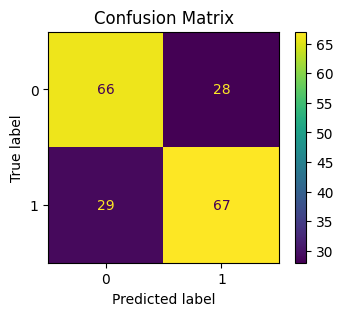

In [73]:
fig, ax = plt.subplots(figsize=(4,3), dpi=100)
display = ConfusionMatrixDisplay(confusion, display_labels=[0,1])
ax.set(title='Confusion Matrix')

display.plot(ax=ax);

## Random Forest Model - New

In [74]:
X = df.drop(['WinningTeam', 'innings_total','TeamA_innings_total', 'TeamB_innings_total'], axis=1)
y = df.WinningTeam

In [75]:
X.shape, y.shape

((948, 106), (948,))

In [76]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
# model
rf = RandomForestClassifier(n_estimators=100) #standard parameters

In [78]:
# cross valdation
cv = cross_validate(rf, X, y, cv=5)

/Users/mgomboski/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [79]:
cv

{'fit_time': array([0.65588713, 0.44367266, 0.52947116, 0.43636584, 0.39723086]),
 'score_time': array([0.02622986, 0.02797413, 0.02889013, 0.02705503, 0.03103805]),
 'test_score': array([0.5       , 0.37368421, 0.45263158, 0.51851852, 0.52910053])}

In [80]:
cv['test_score'].mean()

0.4747869674185464

In [81]:
# fit the model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [82]:
y_pred = rf.predict(X_test)

In [83]:
accuracy = accuracy_score(y_test, y_pred)

In [84]:
print(f"Accuracy Model with Random Forest: {accuracy}")

Accuracy Model with Random Forest: 0.47719298245614034


In [85]:
confusion = confusion_matrix(y_test, y_pred)

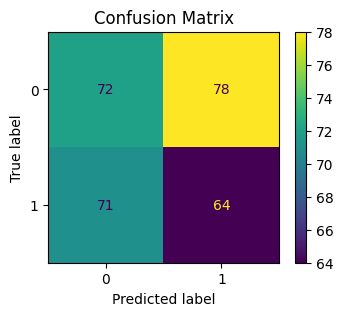

In [86]:
fig, ax = plt.subplots(figsize=(4,3), dpi=100)
display = ConfusionMatrixDisplay(confusion, display_labels=[0,1])
ax.set(title='Confusion Matrix')

display.plot(ax=ax);